In [2]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
from tabulate import tabulate

## **Extractor Líquido-Líquido**

Una planta de extracción a contracorriente es usada para extraer acetona de una mezcla acuosa por medio de metil isobutil cetona (MIK) a 25°C. La alimentación consiste en 40% acetona y 60% agua. Solvente puro igual en masa a la alimentación se usa como líquido de extracción. ¿Cuántas etapas ideales se requieren para extraer 99% de la alimentación de acetona? ¿Cuál es la composición del extracto después de separado el solvente?

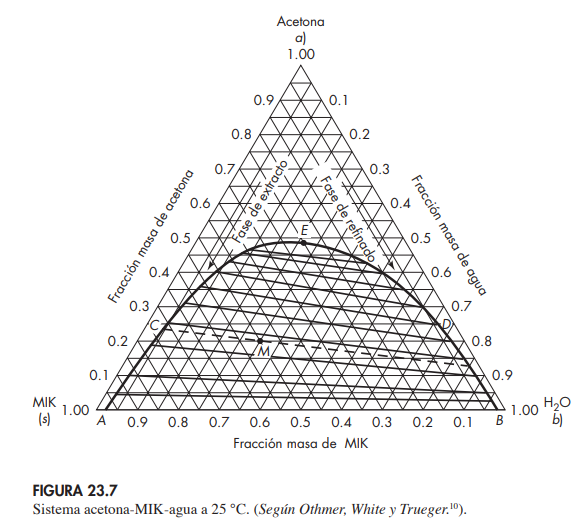

In [27]:
F1=100 #kg/hr Alimentación de solución
F2=100 #kg/hr Alimentación de solvente
m1=0.4*100 #kg/hr de masa total de acetona
m2=0.6*100 #kg/hr de masa total de agua
Prozent=0.99 #fracción recuperada
Ae=m1*Prozent #Acetona recuperada en el extracto
Ar=m1*(1-Prozent) #Acetona remanente en el refinado
La=F1 #Flujo de solución de entrada
Va=F2+Ae #Flujo de extrracto
Vb=F2 #Flujo de solvente
Lb=m2+Ar #Flujo de refinado
ya=Ae/Va #Fracción de acetona en el extracto Se supone inicialmente que m y n son cercanos a cero, después se ajustan
xa=Ar/Lb #Fracción de acetona en el refinado
yH2O=float(input("Inserte la concentración del agua en el extracto con fracción ya, esto de acuerdo al diagrama ternario:"))
n=(yH2O/(1-yH2O))*(Ae+F1) #Flujo de agua en el extracto
xMIK=float(input("Inserte la concentración del MIK en el refinado con fracción xa, esto de acuerdo al diagrama ternario:"))
m=(xMIK/(1-xMIK))*(Ar+m2-n) #Flujo de MIK en el refinado
n=(yH2O/(1-yH2O))*(Ae+F1-m) #Flujo n corregido
Va=Ae+n+(F2-m) #Ahora que se conocen los valores de m y n, se corrigen los flujos Va y Lb, así como ya y xa)
ya=Ae/Va
Lb=Ar+(m2-n)+m
xa=Ar/Lb

data = {
  "Va (kg/h)": [Va],
  "Lb (kg/h)": [Lb],
  "yA": [ya],
  "xA":[xa],


}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print(colored_table)




Inserte la concentración del agua en el extracto con fracción ya, esto de acuerdo al diagrama ternario:0.049
Inserte la concentración del MIK en el refinado con fracción xa, esto de acuerdo al diagrama ternario:0.02
+----+-------------+-------------+----------+------------+│
|    |   Va (kg/h) |   Lb (kg/h) |       yA |         xA |│
+====+=============+=============+==========+============+│
|  0 |     145.651 |      54.349 | 0.271883 | 0.00735985 |│
+----+-------------+-------------+----------+------------+│



Inserte la concentración del agua en el extracto con fracción yn, esto de acuerdo al diagrama ternario:0.03
Inserte la concentración del MIK en el extracto con fracción yn, esto de acuerdo al diagrama ternario:0.85
Etapas de equilibrio, punto por punto
     Xplatos         Yplatos      
    0.4000000       0.2718827 
    0.1474500       0.2718827 
    0.1474500       0.0836634 
    0.0478960       0.0836634 
    0.0478960       0.0226869 
    0.0150391       0.0226869 
    0.0150391       0.0042027 
    0.0024989       0.0042027 
i = 8
Para saber las etapas de equilibrio analíticamente, se cuentan los puntos antes de que Y=YN1 y se dividen entre dos, en este caso el número de puntos es igual a i (i = 8 ), por lo tanto NoPuntos =  8 . Si el i > 8 , los escalones de la gráfica pasarían la línea de LN+1 (línea punteada azul), de esta manera también se podría observar que el número de platos es mayor al necesario.
Por lo tanto el número de etapas de equilirbio es: 4.0


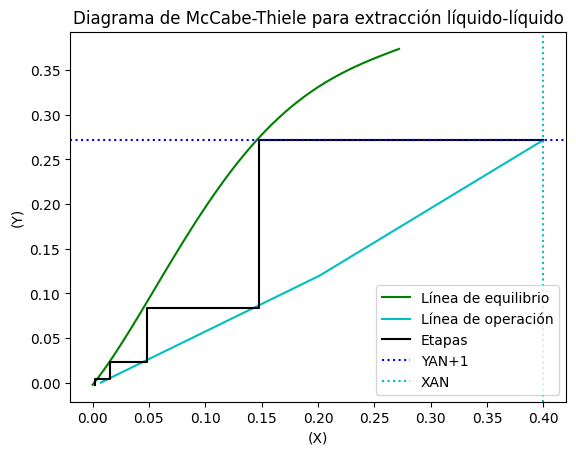

In [58]:
#Para obtener un punto intermedio en la línea de operación
#yn se elige un punto intermedio
yo=0.12



yH2O=float(input("Inserte la concentración del agua en el extracto con fracción yn, esto de acuerdo al diagrama ternario:"))
yMIK=float(input("Inserte la concentración del MIK en el extracto con fracción yn, esto de acuerdo al diagrama ternario:"))
Vb=F2
V=Vb/yMIK
L=Lb+V-Vb
xo=(Ar+V*(yo)-(0*Vb))/L


xn=[xa,xo,0.4]
yn1=[0,yo,ya]



yop=np.linspace(xa,0.4,50)
aop=np.polyfit(xn,yn1,2)
xop=np.polyval(aop,yop)

print ("Etapas de equilibrio, punto por punto")
print('     Xplatos         Yplatos      ')
yp=ya
YP = [ya]
XP = [0.4]
i = 0

#Cálculo de la línea de equilibrio
x=[0,0.03,0.055,0.1,0.13,0.15,0.21,0.25,0.3,0.39,0.4,0.43,0.49] #Fracción de soluto en el refinado
y=[0,0.05,0.1,0.2,0.24,0.3,0.32,0.36,0.4,0.43,0.46,0.47,0.49] #Fracción de soluto en el extracto
alfa=np.polyfit(y,x,5)
alfa2=np.polyfit(x,y,5)


plt.show()

xp=np.polyval(alfa,ya)


while yp > 0 : #Este ciclo permite asignar los valores de "X" y "Y" para los escalones que se construyen entre las líneas de operación y equilibrio
    xp = np.polyval(alfa,YP[i]) # A partir de un valor inicial de "Y" se sustituye en la ecuación de equilibrio
    XP.append(xp)
    yp = np.polyval(aop,XP[i]) #La fracción en líquido asignada en la ecuación de equilibrio se sustituye en la línea de operación para dar un nuevo valor de "Y" para asignar cuando se reinicia el ciclo
    YP.append(yp)
    print ('%13.7f %15.7f ' % (XP[i],YP[i]))
    i += 1
print ("i =", i)

NE = i/2
print ("Para saber las etapas de equilibrio analíticamente, se cuentan los puntos antes de que Y=YN1 y se dividen entre dos, en este caso el número de puntos es igual a i (i =",i,"), por lo tanto NoPuntos = ",i,". Si el i >",i,", los escalones de la gráfica pasarían la línea de LN+1 (línea punteada azul), de esta manera también se podría observar que el número de platos es mayor al necesario.")
print ("Por lo tanto el número de etapas de equilirbio es:", NE)


plt.title('Diagrama de McCabe-Thiele para extracción líquido-líquido')
plt.xlabel('(X)')
plt.ylabel('(Y)')
plt.plot(xop,np.polyval(alfa2,xop), color='g', label = 'Línea de equilibrio')
plt.plot(xn, np.polyval(aop,xn),color='c', label = 'Línea de operación')
plt.plot(XP, YP, '-', color='k', label = 'Etapas')
axhline(ya, color='b', ls="dotted", label = 'YAN+1')
axvline(0.4, color='c', ls="dotted", label = 'XAN')
plt.legend()
plt.show()

